In [36]:
from mlc.util.resources import model_path
import json
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score
import matplotlib.pyplot as plt

In [37]:
#opening latest model results
model_to_plot = "latest"
cpp_to_plot = "latest"

path = model_path("cnn_mod") / model_to_plot / cpp_to_plot / "eval.json"

with open(path, "r") as f:
    results_dict = json.load(f)

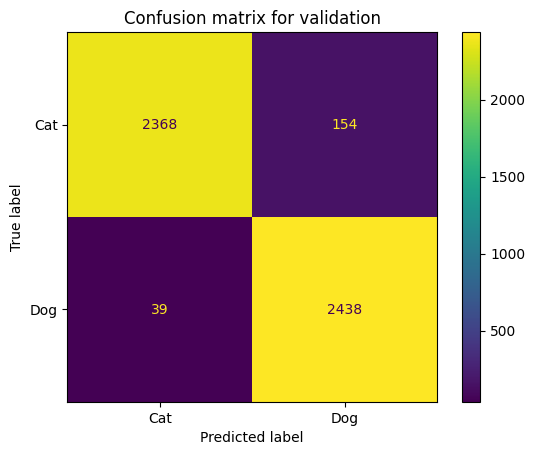

Model accuracy: 0.961
Model f1 score: 0.962


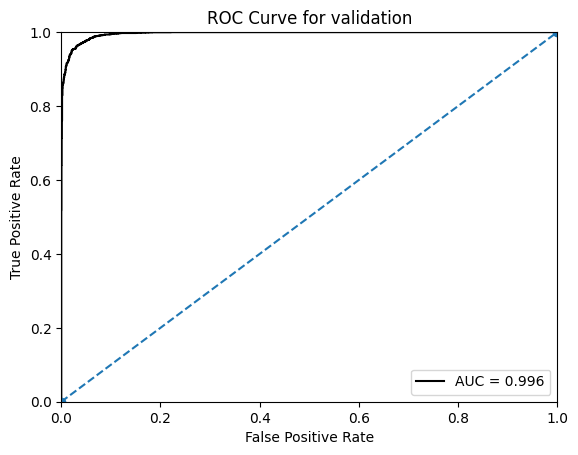

In [38]:
#plotting results
fold = "validation"

ypreds = np.array(results_dict[fold]["predictions"])
ytrue = np.array(results_dict[fold]["true"]).astype(int)

conf_m = confusion_matrix(ytrue, (ypreds>0.5))
disp = ConfusionMatrixDisplay(conf_m, display_labels=["Cat", "Dog"])
disp.plot()
plt.title(f"Confusion matrix for {fold}")
plt.show()

print(f"Model accuracy: {round(np.sum(ytrue == (ypreds>0.5)) / ytrue.shape[0], 3)}")
print(f"Model f1 score: {round(f1_score(ytrue, (ypreds>0.5)), 3)}")

fpr, tpr, threshold = roc_curve(ytrue, ypreds)
roc_auc = auc(fpr, tpr)
plt.title(f'ROC Curve for {fold}')
plt.plot(fpr, tpr, 'black', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'o--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
